# Import libraries
                              

In [1]:
import  numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
#import tensorflow as tf
import os
#from keras.preprocessing.image import load_img,img_to_array


In [2]:
!pip install tensorflow.keras

ERROR: Could not find a version that satisfies the requirement tensorflow.keras (from versions: none)
ERROR: No matching distribution found for tensorflow.keras


## Loading data from drive and visualize it

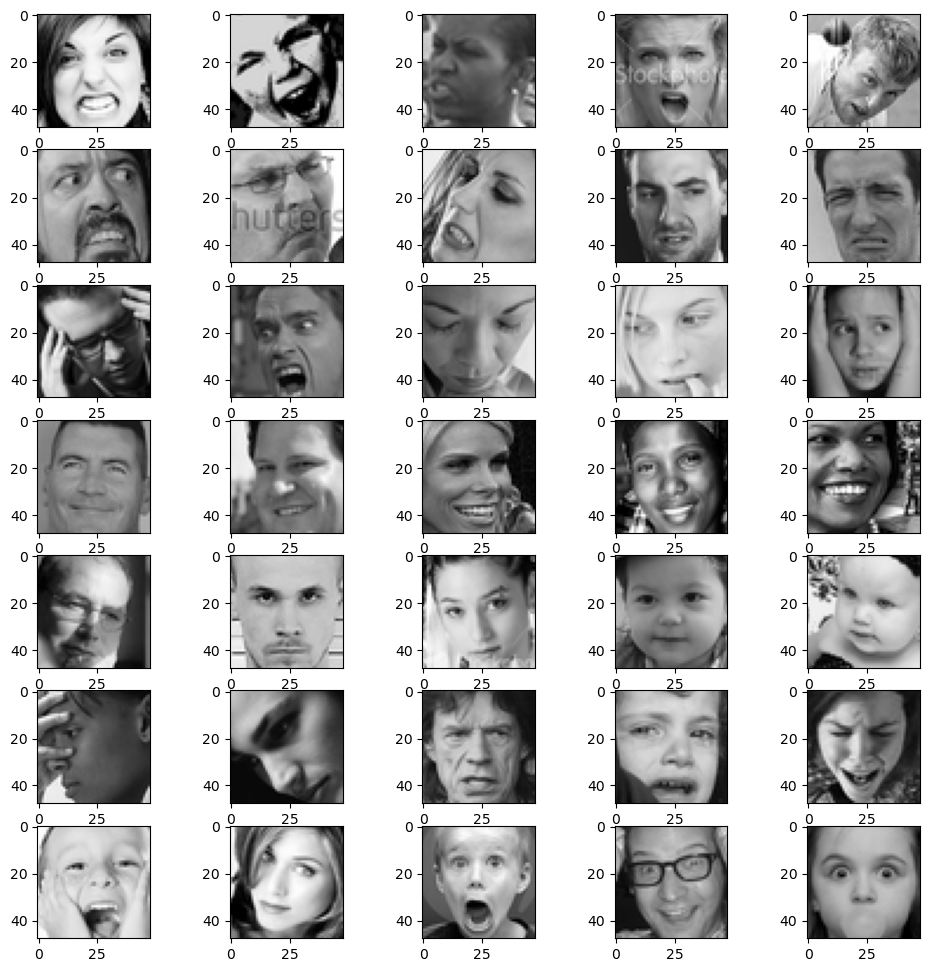

In [2]:
pic_size=48
image_path="F:\\AI COURSE\\kaggle data\\Dataset"
plt.figure(0,figsize=(12,12))
cpt=0
for expression in os.listdir(image_path +"\\train"):
    for i in range(1,6):
        cpt=cpt+1
        plt.subplot(7,5,cpt)
        img=load_img(image_path + "\\train" +"\\" + expression + "\\" + os.listdir(image_path + "\\train" +"\\"+ expression)[i],
                    target_size=(pic_size,pic_size))
        plt.imshow(img,cmap="gray")

# Check number of images in each class

In [3]:
for expression in os.listdir(image_path + "\\train"):
    print(str(len(os.listdir(image_path + "\\train"+"\\" + expression))) + "    "+ expression)

4447    anger
493    disgust
4593    fear
8110    happiness
5571    neutral
5483    sadness
3582    surprise


In [4]:
for expression in os.listdir(image_path + "\\test"):
    print(str(len(os.listdir(image_path + "\\test"+"\\" + expression))) + "    "+ expression)

491    anger
55    disgust
527    fear
879    happiness
626    neutral
594    sadness
416    surprise


In [5]:
labels=os.listdir(image_path+"\\train")
labels

['anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']

In [6]:
import cv2

# Dividing into batches

In [7]:
from keras.preprocessing.image import ImageDataGenerator
batch_size=64
train_gen=ImageDataGenerator(rescale=1.0/255)
train_data=train_gen.flow_from_directory(image_path+"\\train",target_size=(pic_size,pic_size),
                                         color_mode="grayscale",
                                         batch_size=batch_size,
                                         class_mode="categorical",
                                         shuffle=True)
valid_gen=ImageDataGenerator(rescale=1.0/255)
valid_data=valid_gen.flow_from_directory(image_path+"\\test",target_size=(pic_size,pic_size),
                                         color_mode="grayscale",
                                         batch_size=batch_size,
                                         class_mode="categorical",
                                         shuffle=True)

Found 32278 images belonging to 7 classes.
Found 3588 images belonging to 7 classes.


In [8]:
label=len(os.listdir(image_path+'\\train'))
label

7

# Import CNN model and Layers from keras 

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Input,Dropout,Activation,GlobalAveragePooling2D,BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
early=EarlyStopping(monitor="accuracy",patience=5,restore_best_weights=True)

In [10]:
model=Sequential()
model.add(Conv2D(32,kernel_size=2,padding='same',activation='relu',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#model.add(Dropout(0.25))


In [11]:
model.add(Conv2D(64,kernel_size=3,padding='same',activation='relu',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#model.add(Dropout(0.25))


In [12]:
model.add(Conv2D(128,kernel_size=5,padding='same',activation='relu',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#model.add(Dropout(0.25))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.25))

In [15]:
model.add(Dense(label,activation="softmax"))

In [16]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [19]:
his = model.fit(train_data,epochs=5,validation_data=valid_data,verbose=1)

Epoch 1/5
505/505 [==============================] - 1242s 2s/step - loss: 1.6784 - accuracy: 0.3319 - val_loss: 2.1343 - val_accuracy: 0.3030
Epoch 2/5
505/505 [==============================] - 303s 601ms/step - loss: 1.4661 - accuracy: 0.4302 - val_loss: 1.5350 - val_accuracy: 0.4200
Epoch 3/5
505/505 [==============================] - 309s 611ms/step - loss: 1.3868 - accuracy: 0.4652 - val_loss: 1.3486 - val_accuracy: 0.4774
Epoch 4/5
505/505 [==============================] - 304s 602ms/step - loss: 1.3191 - accuracy: 0.4929 - val_loss: 1.3332 - val_accuracy: 0.4813
Epoch 5/5
505/505 [==============================] - 304s 603ms/step - loss: 1.2636 - accuracy: 0.5216 - val_loss: 1.2825 - val_accuracy: 0.4953
